In [1]:
import altair as alt
import pandas as pd
import numpy as np

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/OlexandrBratus/Introduction-to-Data-Visualization/master/population_prospects.csv')
df.head()

,year,population,type
0,1950,37297.640,estimate
1,1951,37815.540,estimate
2,1952,38360.078,estimate
3,1953,38915.814,estimate
4,1954,39471.403,estimate


In [5]:
df['label'] = 'Data: UN World Population Prospects'
df['projection'] = 'projection'
label1 = []
type_texts = ['medium variant', 'high variant', 'low variant',
                'constant fertility', 'instant replacement', 'momentum',
                'zero migration', 'constant mortality', 'no change']
colors = ['#d53e4f', '#d53e4f', '#d53e4f', 
            '#5D646F', '#5D646F', '#5D646F', 
            '#5D646F', '#5D646F', '#5D646F']
styles = ['bold', 'bold', 'bold',
            'normal', 'normal', 'normal',
            'normal', 'normal', 'normal',]
dys = [-4,1,0,
      -2,-1,0,
      4,2,0]

In [6]:
for t, c, dy, st in zip(type_texts, colors, dys, styles):
    label1.append(alt.Chart(df).mark_text(
        align='left',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        fontStyle=st,
        color=c,
        dx = 12,
        dy = dy
    ).transform_filter(
        'datum.year >= 2100 & datum.type == "{}"'.format(t)
    ))

label = label1[0]
for a in label1[1:]:
    label = label + a

k = label1[0].encode(
    x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
            axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
            axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
    text='type'
)

label = label.encode(
    x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
            axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
            axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
    text='type'
)

label2 = alt.Chart(df).mark_text(
        align='right',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#3288bd',
        dy=-20
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
                axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
                axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
        text='type'
    ).transform_filter(
        'datum.year==1991'
)

label3 = alt.Chart(df).mark_text(
        align='center',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#d53e4f',
        dy=-175
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
                axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
                axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
        text='projection'
    ).transform_filter(
        'datum.year==2060 & datum.type=="momentum"'
)

label4 = alt.Chart(df).mark_text(
        align='center',
        baseline='middle',
        fontSize = 13,
        font='Ubuntu Mono',
        color='#5D646F',
        dy=250,
        dx=25
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
                axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
                axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
        text='label'
    ).transform_filter(
        'datum.year==2100 & datum.type=="momentum"'
)

labels = label2 + label3 + label4

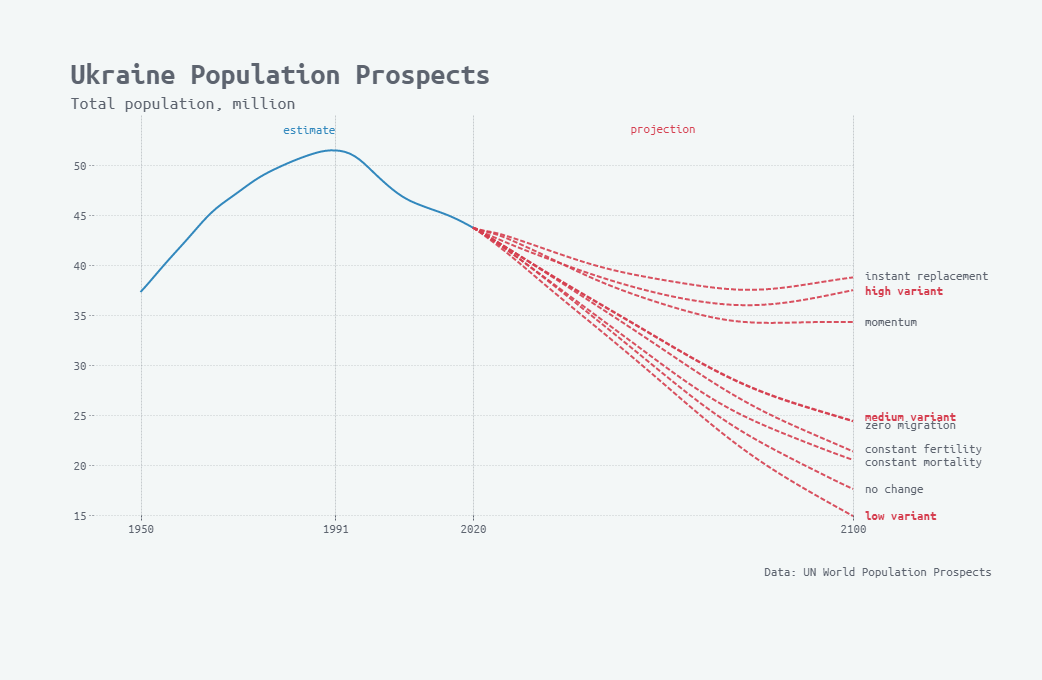

In [7]:
chart1 = alt.Chart(df, width=760, height=400).mark_line(color='#3288bd').encode(
    x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
            axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
            axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
).transform_filter(
    'datum.type == "estimate"'
)

chart2 = [
    alt.Chart(df, width=760, height=400
    ).mark_line(
        color='#d53e4f',
        strokeDash=(5,2),
        strokeWidth=2,
        strokeOpacity=.9
    ).encode(
        x=alt.X('year', scale=alt.Scale(domain=[1950, 2100]),
                axis=alt.Axis(values=[1950, 1991, 2020, 2100], format='0.0f')),
        y=alt.Y('y:Q', scale=alt.Scale(domain=[15, 52]),
                axis=alt.Axis(values=[15, 20, 25, 30, 35, 40, 45, 50])),
    ).transform_filter(
        'datum.type == "{}"'.format(t) 
    )
    for t in filter(lambda x: (x != 'estimate') & (x != 'line'), df.type.unique())
]

chart = chart1 + label + labels
for c in chart2:
    chart = chart + c

chart = chart.transform_calculate(y = 'datum.population / 1000')
    
subtitle = alt.Chart(
    {"values": [{"text": "          Total population, million"}]}
).mark_text(size=18,
            color='#5D646F', 
            font='Ubuntu Mono',
            align='center'
).encode(
    text="text:N"
)

alt.vconcat(
    subtitle,
    chart
).properties(
    padding={'left': -20, 'top': 60, 'right': 50, 'bottom': 100},
    title=alt.TitleParams('Ukraine Population Prospects',dx=90),
    background='#F3F7F7'
).configure_title(
    color='#5D646F',
    font='Ubuntu Mono',
    fontSize=30,
    anchor='start'
).configure_view(
    stroke=None
).configure_concat(
    spacing=1
).configure_axis(
    labelFont='Ubuntu Mono',
    labelColor='#5D646F',
    labelFontSize=13,
    domain=False,
    tickColor='#5D646F',
    tickWidth=.9,
    gridColor='#5D646F',
    gridDash=(1,2),
    gridWidth=.9,
    gridDashOffset=15,
    gridOpacity=0.3
).configure_axisX(
    title=None,
    titleX=700,
    titleY=50,
    gridDash=(2,1),
    tickDash=(2,1),
    labelFlush=False,
    tickOffset=0
).configure_axisY(
    title=None,
    tickDash=(1,2),
    tickOffset=0
)